In [0]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.examples.tutorials.mnist import input_data
mnist=input_data.read_data_sets("data/mnist",one_hot=True,reshape=True)

X=tf.placeholder(tf.float32,[None,784])
Y=tf.placeholder(tf.float32,[None,10])


w1=tf.Variable(tf.truncated_normal([784,1024],stddev=0.3))
b1=tf.Variable(tf.zeros([1024]))
w2=tf.Variable(tf.truncated_normal([1024,256],stddev=0.3))
b2=tf.Variable(tf.zeros([256]))
w3=tf.Variable(tf.truncated_normal([256,64],stddev=0.3))
b3=tf.Variable(tf.zeros([64]))
w4=tf.Variable(tf.truncated_normal([64,16],stddev=0.3))
b4=tf.Variable(tf.zeros([16]))
wo=tf.Variable(tf.truncated_normal([16,10],stddev=0.3))
bo=tf.Variable(tf.zeros([10]))

y1=tf.nn.relu(tf.linalg.matmul(X,w1)+b1)
y2=tf.nn.relu(tf.linalg.matmul(y1,w2)+b2)
y3=tf.nn.relu(tf.linalg.matmul(y2,w3)+b3)
y4=tf.nn.tanh(tf.linalg.matmul(y3,w4)+b4)
y_pred=tf.nn.softmax(tf.linalg.matmul(y4,wo)+bo)

xent=-tf.reduce_sum(Y*tf.math.log(y_pred))

correct_pred=tf.equal(tf.argmax(Y,1),tf.argmax(y_pred,1))
accuracy=tf.reduce_mean(tf.cast(correct_pred,tf.float32))

optimizer=tf.train.AdamOptimizer(7e-4).minimize(xent)


with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())
  for i in range(6001):
    batch_x,batch_y=mnist.train.next_batch(512)
    sess.run(optimizer,feed_dict={X:batch_x,Y:batch_y})
    if i%100==0:
      acc,xent_loss=sess.run([accuracy,xent],feed_dict={X:batch_x,Y:batch_y})
      print("Iteration",i,"Accuracy="+str(acc),"Cross Entropy Loss="+str(xent_loss))
  
  tf.train.Saver().save(sess,"data/model/model.cktp")
  input_im=np.array(mnist.train.images[0:100])
  layer1_im=sess.run(y1,feed_dict={X:input_im})
  layer2_im=sess.run(y2,feed_dict={X:input_im})
  layer3_im=sess.run(y3,feed_dict={X:input_im})
  layer4_im=sess.run(y4,feed_dict={X:input_im})
  layer5_im=sess.run(y_pred,feed_dict={X:input_im})



Extracting data/mnist/train-images-idx3-ubyte.gz
Extracting data/mnist/train-labels-idx1-ubyte.gz
Extracting data/mnist/t10k-images-idx3-ubyte.gz
Extracting data/mnist/t10k-labels-idx1-ubyte.gz
Iteration 0 Accuracy=0.10546875 Cross Entropy Loss=1445.6228
Iteration 100 Accuracy=0.75 Cross Entropy Loss=558.7277
Iteration 200 Accuracy=0.8769531 Cross Entropy Loss=343.2083
Iteration 300 Accuracy=0.8925781 Cross Entropy Loss=286.3761
Iteration 400 Accuracy=0.93359375 Cross Entropy Loss=176.9653
Iteration 500 Accuracy=0.9296875 Cross Entropy Loss=179.79077
Iteration 600 Accuracy=0.9472656 Cross Entropy Loss=144.63947
Iteration 700 Accuracy=0.9355469 Cross Entropy Loss=127.5211
Iteration 800 Accuracy=0.9375 Cross Entropy Loss=123.62185
Iteration 900 Accuracy=0.94921875 Cross Entropy Loss=108.78699
Iteration 1000 Accuracy=0.9394531 Cross Entropy Loss=114.50403
Iteration 1100 Accuracy=0.9550781 Cross Entropy Loss=93.23221
Iteration 1200 Accuracy=0.96484375 Cross Entropy Loss=74.6858
Iteration 1

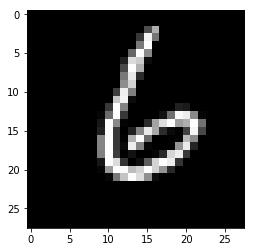

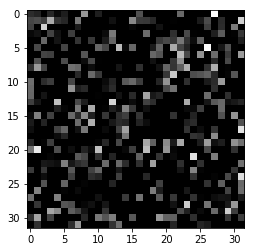

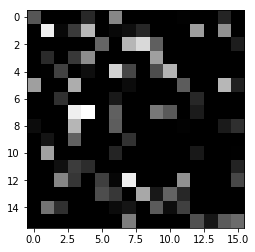

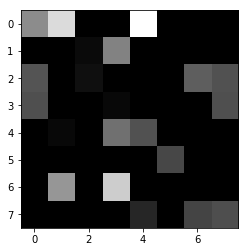

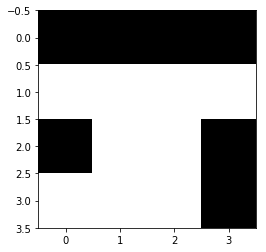

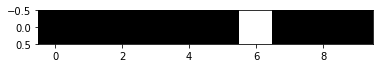

In [0]:
plt.imshow(input_im[85].reshape(28,28),cmap="gray")
plt.show()
plt.imshow(layer1_im[85].reshape(32,32),cmap="gray")
plt.show()
plt.imshow(layer2_im[85].reshape(16,16),cmap="gray")
plt.show()
plt.imshow(layer3_im[85].reshape(8,8),cmap="gray")
plt.show()
plt.imshow(layer4_im[85].reshape(4,4),cmap="gray")
plt.show()
plt.imshow(layer5_im[85].reshape(1,10),cmap="gray")
plt.show()